In [1]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


## Loading dataset and plotting

In [3]:
stock_data = pd.read_csv('./NFLX.csv', index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-05,540.010010,542.849976,529.229980,540.669983,540.669983,3355900
2021-04-06,544.809998,554.169983,543.299988,544.530029,544.530029,3474200
2021-04-07,543.500000,549.640015,541.450012,546.989990,546.989990,2151300
2021-04-08,551.130005,556.900024,547.570007,554.580017,554.580017,4309800
2021-04-09,552.690002,556.900024,547.109985,555.309998,555.309998,2894000


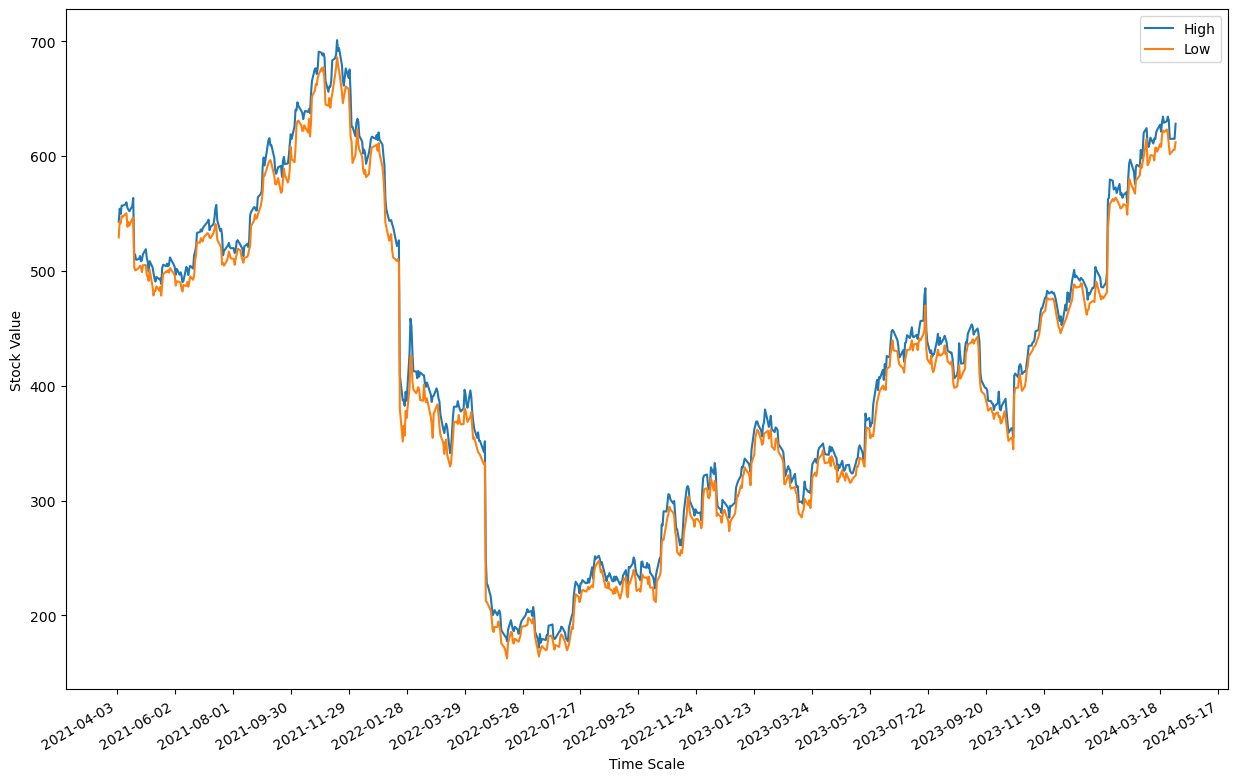

In [4]:
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label='High')
plt.plot(x_dates, stock_data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Stock Value')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


## Data Preprocessing

Normalize or rescale the data within a fixed range when dealing with real data. This will avoid features with larger numeric values to unjustly interfere and bias the model and help achieve rapid convergence

In [5]:
target_y = stock_data['Close']
X_features = stock_data.iloc[:, 0:3]

In [6]:
#Feature Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X_features.values)
X_scaled = pd.DataFrame(columns=X_features.columns, data=X_scaled, index=X_features.index)

In [7]:
# Splitting data for LSTM
def lstm_split(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps + 1):
        X.append(data[i:i + n_steps, :-1])
        y.append(data[i + n_steps - 1, -1])
    return np.array(X), np.array(y)

## Train and Test Sets for Stock Price Prediction Project

In [8]:
n_steps = 2  # Define the number of steps for the LSTM model
X1, y1 = lstm_split(X_scaled.values, n_steps=n_steps)

train_split = 0.8
split_idx = int(np.ceil(len(X1) * train_split))
date_index = X_scaled.index

X_train, X_test = X1[:split_idx], X1[split_idx:]
Y_train, Y_test = y1[:split_idx], y1[split_idx:]
X_train_date, X_test_date = date_index[:split_idx], date_index[split_idx:]

print(X1.shape, X_train.shape, X_test.shape, Y_test.shape) 

(754, 2, 2) (604, 2, 2) (150, 2, 2) (150,)


## Stock Prediction Machine Learning Project- Building the LSTM model

In [9]:
lstm = Sequential()

# Add an LSTM layer with a single unit
# 'input_shape' should match the features of the X_train data
# 'return_sequences' is set to True because you may want to stack LSTM layers
lstm.add(LSTM(1, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))

# Add a Dense layer with a single output unit for regression
lstm.add(Dense(1))

# Compile the model with mean squared error loss and the Adam optimizer
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Print the model summary
lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 1)              16        
                                                                 
 dense (Dense)               (None, 2, 1)              2         
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Fit the LSTM model to the training data
history = lstm.fit(X_train, Y_train,
                   epochs=100, 
                   batch_size=4, 
                   verbose=2, 
                   shuffle=False)

Epoch 1/100
151/151 - 1s - loss: 1.1233 - 675ms/epoch - 4ms/step
Epoch 2/100
151/151 - 0s - loss: 1.1026 - 138ms/epoch - 916us/step
Epoch 3/100
151/151 - 0s - loss: 1.0915 - 131ms/epoch - 870us/step
Epoch 4/100
151/151 - 0s - loss: 1.0641 - 130ms/epoch - 863us/step
Epoch 5/100
151/151 - 0s - loss: 0.9082 - 114ms/epoch - 757us/step
Epoch 6/100
151/151 - 0s - loss: 0.6385 - 107ms/epoch - 707us/step
Epoch 7/100
151/151 - 0s - loss: 0.5625 - 104ms/epoch - 688us/step
Epoch 8/100
151/151 - 0s - loss: 0.5177 - 106ms/epoch - 703us/step
Epoch 9/100
151/151 - 0s - loss: 0.4724 - 106ms/epoch - 704us/step
Epoch 10/100
151/151 - 0s - loss: 0.4258 - 103ms/epoch - 683us/step
Epoch 11/100
151/151 - 0s - loss: 0.3778 - 94ms/epoch - 623us/step
Epoch 12/100
151/151 - 0s - loss: 0.3332 - 93ms/epoch - 617us/step
Epoch 13/100
151/151 - 0s - loss: 0.3006 - 93ms/epoch - 619us/step
Epoch 14/100
151/151 - 0s - loss: 0.2756 - 104ms/epoch - 688us/step
Epoch 15/100
151/151 - 0s - loss: 0.2534 - 107ms/epoch - 706us

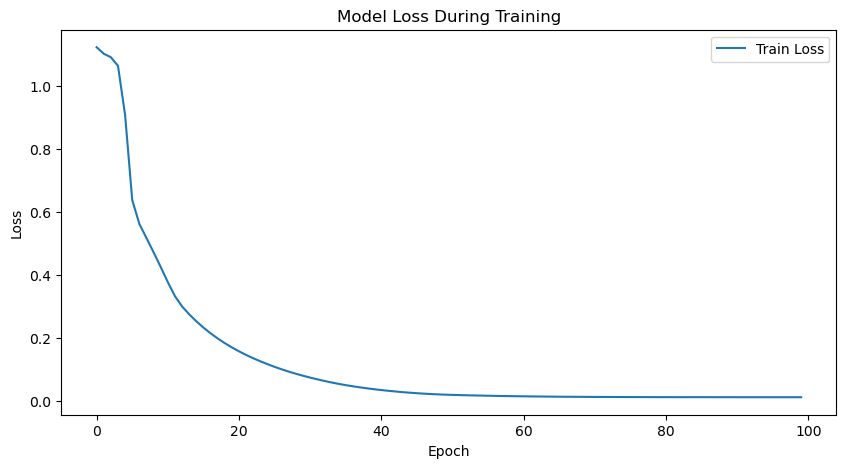

In [11]:
# Assuming 'history' contains the results from the fitting process of the LSTM model
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')

plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


## Machine Learning Stock Prediction Project- Performance Evaluation on Test Set

In [12]:
y_pred = lstm.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [13]:
# y_pred_squeezed = y_pred[:, -1, 0]

# # Now you can calculate RMSE and MAPE
# rmse = mean_squared_error(Y_test, y_pred_squeezed, squared=False)
# mape = mean_absolute_percentage_error(Y_test, y_pred_squeezed)

# print("RMSE:", rmse)
# print("MAPE:", mape)


RMSE: 0.04912503502700679
MAPE: 0.3320246154352836


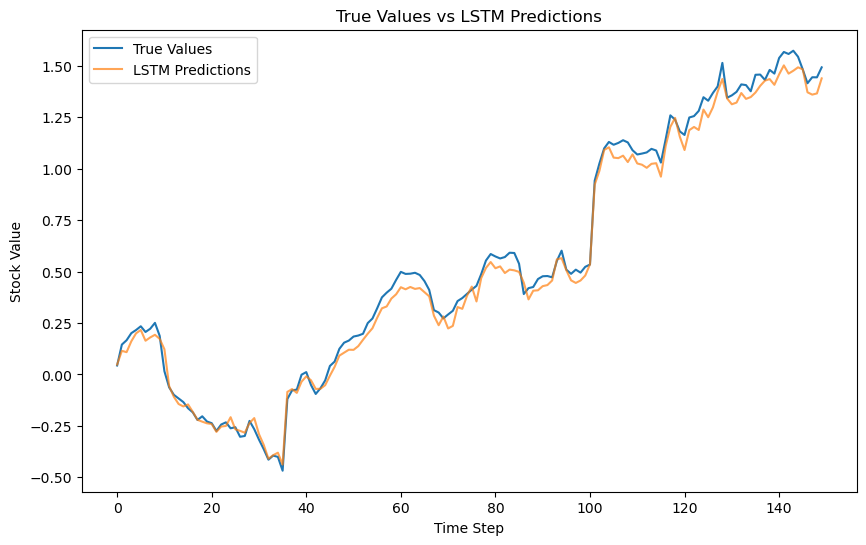

In [14]:
y_pred_squeezed = y_pred[:, -1, 0]  # Squeeze out the last timestep predictions

# Now, 'y_pred_squeezed' should have the same shape as 'Y_test'
# Recalculate RMSE and MAPE
rmse = mean_squared_error(Y_test, y_pred_squeezed, squared=False)
mape = mean_absolute_percentage_error(Y_test, y_pred_squeezed)

# Print the evaluation metrics
print("RMSE:", rmse)
print("MAPE:", mape)

# Plotting true values vs predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='True Values')  # Make sure 'Y_test' is appropriately reshaped if needed
plt.plot(y_pred_squeezed, label='LSTM Predictions', alpha=0.7)
plt.title('True Values vs LSTM Predictions')
plt.xlabel('Time Step')
plt.ylabel('Stock Value')
plt.legend()
plt.show()

### Deeper LSTM model
adding another LSTM layer and increased the number of LSTM units per layer to 50

In [15]:
lstm = Sequential()

# Add the first LSTM layer with 50 units, specifying the input shape and 'relu' activation
lstm.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))

# Add the second LSTM layer with 50 units and 'relu' activation
# 'return_sequences' is set to False by default, which is suitable here since the following layer is Dense
lstm.add(LSTM(50, activation='relu'))

# Add a Dense layer with 1 output unit for regression
lstm.add(Dense(1))

# Compile the model with mean squared error loss and the Adam optimizer
lstm.compile(loss='mean_squared_error', optimizer='adam')

# Print the model summary to see the structure and parameters
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 2, 50)             10600     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30851 (120.51 KB)
Trainable params: 30851 (120.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
y_pred = y_pred[:, -1]  # This slices out the last timestep; adjust if necessary

# Now, y_pred should have shape (samples, features) or (samples,) if you have only one feature

# Recalculate RMSE and MAPE
rmse = mean_squared_error(Y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(Y_test, y_pred)

print("RMSE:", rmse)
print("MAPE:", mape)


RMSE: 0.04912503502700679
MAPE: 0.3320246154352836


RMSE: 0.04912503502700679
MAPE: 0.3320246154352836


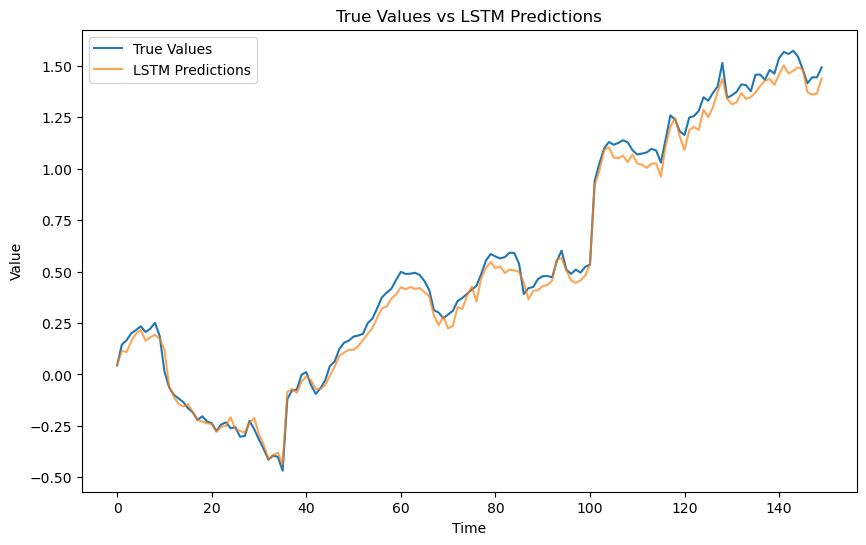

In [17]:
# Assuming y_pred is the prediction from the LSTM model and has shape (samples, timesteps, features)
y_pred = y_pred[:, -1]  # This slices out the last timestep if necessary

# Calculate RMSE and MAPE using the flattened predictions
rmse = mean_squared_error(Y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(Y_test, y_pred)

# Print the evaluation metrics
print("RMSE:", rmse)
print("MAPE:", mape)

# Plotting true values vs predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label='True Values')
plt.plot(y_pred, label='LSTM Predictions', alpha=0.7)
plt.title('True Values vs LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


## LSTM vs. Simple Moving Average vs. Exponential Moving Average for Stock Price Prediction

### Simple Moving Average

Test RMSE: 109.544
Test MAPE: 0.161


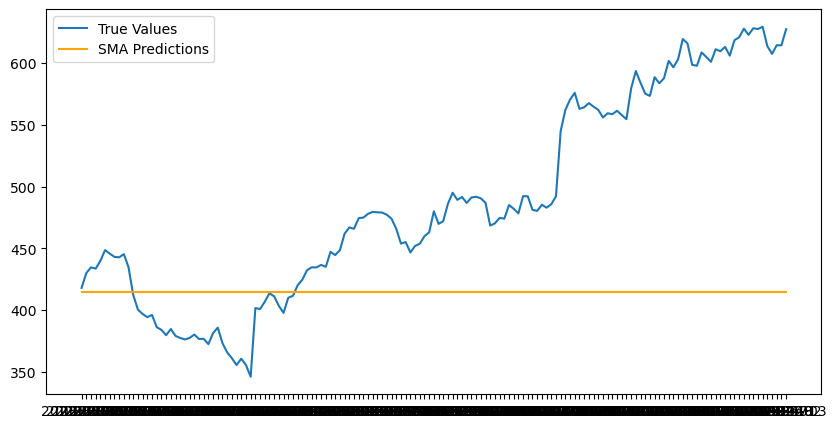

In [18]:
# Assuming stock_data is your DataFrame and it has a 'Close' column
train_split = 0.8
split_idx = int(np.ceil(len(stock_data) * train_split))
train = stock_data['Close'].iloc[:split_idx]
test = stock_data['Close'].iloc[split_idx:]

# Calculate Simple Moving Average for the test set
test_pred = np.array([train.rolling(10).mean().iloc[-1]] * len(test)).reshape((-1, 1))

# Calculate metrics
test_rmse = mean_squared_error(test, test_pred, squared=False)
test_mape = mean_absolute_percentage_error(test, test_pred)

# Printing metrics
print('Test RMSE: %.3f' % test_rmse)
print('Test MAPE: %.3f' % test_mape)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='True Values')
plt.plot(test.index, test_pred, label='SMA Predictions', color='orange')
plt.legend()
plt.show()


### Exponential Moving Average

Test RMSE: 17.958
Test MAPE: 0.030


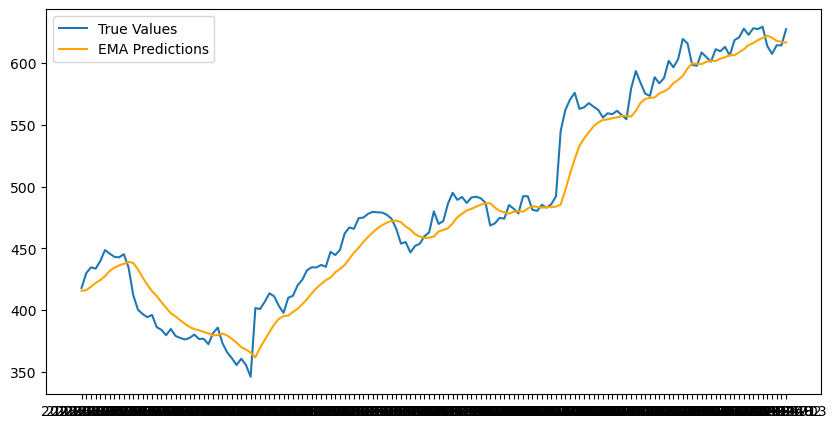

In [19]:
from statsmodels.tsa.api import SimpleExpSmoothing

# Again assuming stock_data is your DataFrame and it has a 'Close' column
x = stock_data['Close'].values
train = x[:split_idx]
test = x[split_idx:]

# Initializing lists to store predictions and the true test values for plotting
test_pred = []
test_concat = np.array([])

for i in range(len(test)):
    train_fit = np.concatenate((train, test_concat))
    fit = SimpleExpSmoothing(train_fit).fit(smoothing_level=0.2)
    test_pred.append(fit.forecast(1)[0])
    test_concat = np.concatenate((test_concat, [test[i]]))

# Convert predictions list to a NumPy array
test_pred = np.array(test_pred).reshape((-1, 1))

# Calculate metrics
test_rmse = mean_squared_error(test, test_pred, squared=False)
test_mape = mean_absolute_percentage_error(test, test_pred)

# Printing metrics
print('Test RMSE: %.3f' % test_rmse)
print('Test MAPE: %.3f' % test_mape)

test_series = stock_data['Close'].iloc[split_idx:]

# Now you can use test_series in your plot to access its index attribute
plt.figure(figsize=(10, 5))
plt.plot(test_series.index, test_series, label='True Values')  # Corrected line
plt.plot(test_series.index, test_pred, label='EMA Predictions', color='orange')  # Corrected line
plt.legend()
plt.show()

